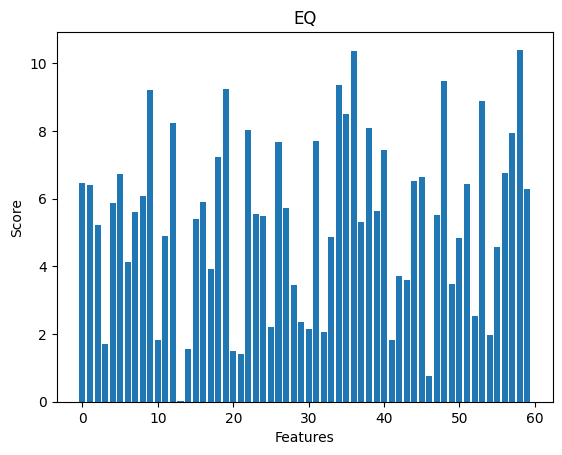

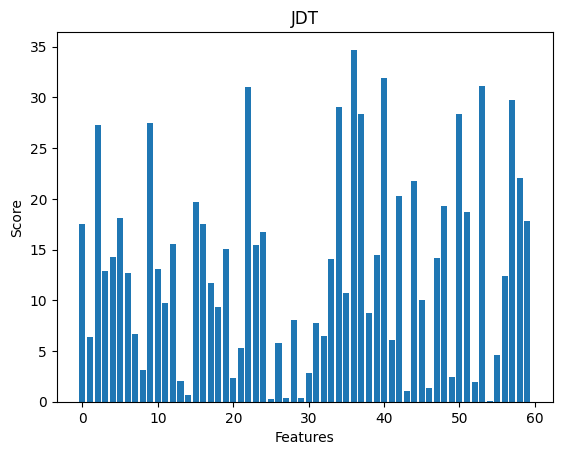

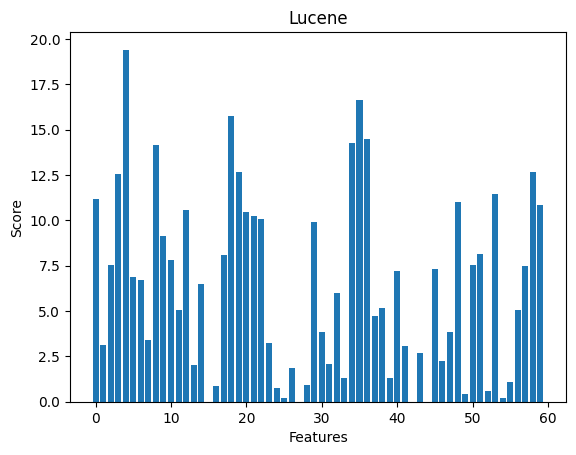

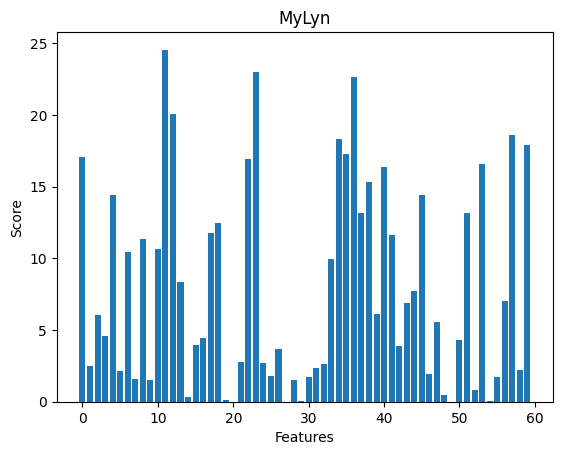

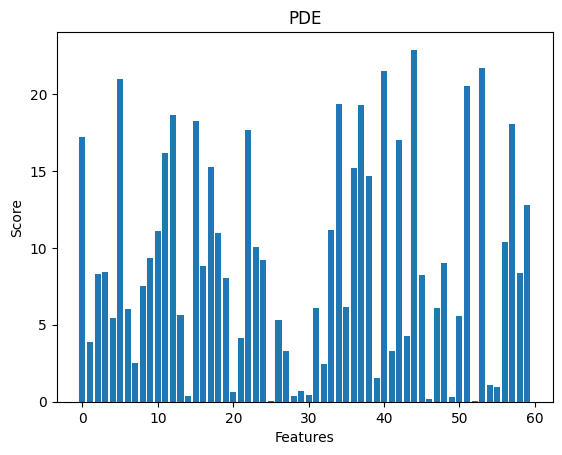

In [13]:
# example of anova f-test feature selection for numerical data
import os
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,mutual_info_classif,chi2,RFECV
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pandas as pd
c = MinMaxScaler()

# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	return X, y

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=chi2, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
df = pd.DataFrame()
l = []
loc = "C:/Users/shubh/Desktop/CorrBoost/Dataset/AEEEM"
for file in os.listdir(loc):
    # load the dataset
    X, y = load_dataset(os.path.join(loc,file))
    X= c.fit_transform(X,y)
    # split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
    # feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
    # what are scores for the features
    # for i in range(len(fs.scores_)):
    #     #if fs.scores_[i] > 0.1:
            
    #         print('Feature %d: %f' % (i, fs.scores_[i]))
    name = file.split(".")[0] + ".jpg"
    l.append(file.split(".")[0])
    
    df = pd.concat([df,pd.Series(fs.scores_)],axis=1)
    # plot the scores
    pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
    pyplot.title(file.split(".")[0])
    pyplot.xlabel("Features")
    pyplot.ylabel("Score")
    pyplot.savefig(name)
    pyplot.show()
df.columns = l
df.to_csv("AEEEM_chi2_scores.csv")

In [58]:
df

,0,0,0,0,0,0,0,0,0,0
0,0.023055,0.066844,0.057197,0.008549,0.145995,0.080866,0.067915,0.003206,0.061926,0.061849
1,0.053364,0.073675,0.033419,0.004667,0.041178,0.039975,0.030258,0.000000,0.000000,0.013396
2,0.058490,0.000000,0.027947,0.007325,0.122926,0.003177,0.013148,0.010043,0.000000,0.018106
3,0.000000,0.026166,0.074071,0.010065,0.000000,0.000000,0.043405,0.006903,0.040767,0.130116
4,0.046750,0.070642,0.037973,0.004857,0.167461,0.036211,0.056115,0.003520,0.052280,0.034379
5,0.017652,0.062321,0.000000,0.006139,0.072586,0.056675,0.018646,0.003768,0.006211,0.056132
6,0.010220,0.016982,0.028652,0.003696,0.010719,0.051634,0.037572,0.003370,0.029739,0.024397
7,0.008780,0.082838,0.054404,0.010713,0.000000,0.000000,0.039547,0.005192,0.017416,0.078770
8,0.036717,0.101019,0.000000,0.002934,0.039933,0.057046,0.027368,0.001466,0.007320,0.067137
9,0.042675,0.089585,0.059347,0.001298,0.046148,0.029440,0.020528,0.002886,0.000000,0.050033


In [49]:
df = read_csv("C:/Users/shubh/Desktop/CorrBoost/Dataset/AEEEM/PDE.csv")
df.values

array([[3.97600e-03, 5.18900e-03, 2.00000e+00, ..., 2.09245e-01,
        4.77000e-03, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.26400e-03, 0.00000e+00, 7.00000e+00, ..., 5.42400e-02,
        2.45300e-03, 0.00000e+00],
       ...,
       [2.67900e-03, 4.29500e-03, 5.00000e+00, ..., 6.50360e-02,
        2.96900e-03, 0.00000e+00],
       [3.03300e-03, 1.10230e-02, 1.00000e+00, ..., 5.00980e-02,
        3.45500e-03, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 3.00000e+00, ..., 3.63100e-02,
        0.00000e+00, 1.00000e+00]])

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
# Load the dataset
df = pd.read_csv("C:/Users/shubh/Desktop/CorrBoost/Dataset/AEEEM/EQ.csv")
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
 
# # Converting to DataFrame for better visualization
# column_names = [f'feature_{i}' for i in range(X.shape[1])]
# df = pd.DataFrame(X, columns=column_names)
# df['target'] = y
 
print("Original Dataset:")
print(df.head())
 
# Applying Chi-Square feature selection and
# Selecting top k features
k = 2
chi2_selector = SelectKBest(chi2, k='all')
X_new = chi2_selector.fit_transform(X, y)
 
selected_features = df.columns[:-1][chi2_selector.get_support()]
print("\nSelected Features:")
print(selected_features)

Original Dataset:
   LDHH_lcom  LDHH_fanIn  numberOfNonTrivialBugsFoundUntil:  \
0   0.002547    0.002555                                  4   
1   0.008643    0.004756                                 71   
2   0.001479    0.009143                                  5   
3   0.005642    0.005395                                 38   
4   0.001350    0.000000                                  1   

   WCHU_numberOfPublicAttributes  WCHU_numberOfAttributes  CvsWEntropy  \
0                           0.00                     3.04     0.393707   
1                           0.00                    14.37     2.093750   
2                           1.01                     3.08     0.484675   
3                           0.00                     1.06     0.811584   
4                           1.01                     1.01     0.031940   

   LDHH_numberOfPublicMethods  WCHU_fanIn  LDHH_numberOfPrivateAttributes  \
0                    0.003049        1.01                        0.004091   
1   